<a href="https://colab.research.google.com/github/Swaralidadhi/Cognifyz_Investment_Analysis/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib numpy


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Data_set 2 - Copy.csv to Data_set 2 - Copy.csv


In [15]:
#Task1
import pandas as pd

# Load dataset
df = pd.read_csv("Data_set 2 - Copy.csv")
# Display basic information
print(df.info())   # Column names, data types, missing values
print(df.describe())  # Summary statistics for numerical columns
print(df.head())  # First 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

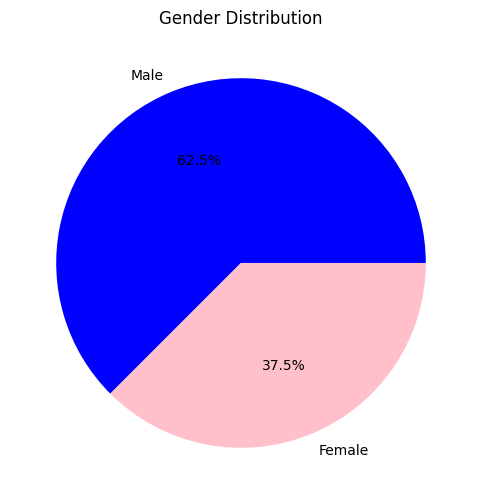

<ipython-input-7-080c9cc77390>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette="pastel")


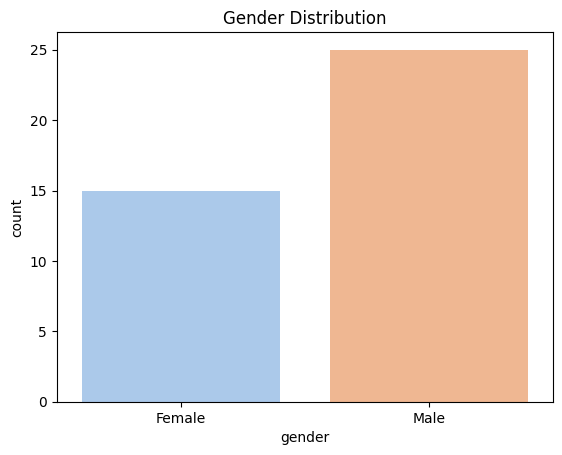

In [7]:
#Task 2: Gender Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count gender values
gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title("Gender Distribution")
plt.show()

# OR Bar Chart
sns.countplot(data=df, x='gender', palette="pastel")
plt.title("Gender Distribution")
plt.show()


In [8]:
#level 2
#task 3
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Calculate statistics
statistics = numerical_cols.describe().T[['mean', '50%', 'std']]
statistics.rename(columns={'50%': 'median'}, inplace=True)

print(statistics)


                    mean  median       std
age               27.800    27.0  3.560467
Mutual_Funds       2.550     2.0  1.197219
Equity_Market      3.475     4.0  1.131994
Debentures         5.750     6.5  1.675617
Government_Bonds   4.650     5.0  1.369072
Fixed_Deposits     3.575     3.5  1.795828
PPF                2.025     1.0  1.609069
Gold               5.975     6.0  1.143263


In [10]:
#Task 4: Most Preferred Investment Avenue
# Count occurrences of each investment avenue
investment_counts = df['Investment_Avenues'].value_counts()

# Display the most preferred
print(f"Most preferred investment avenue: {investment_counts.idxmax()}")
print(investment_counts)


Most preferred investment avenue: Yes
Investment_Avenues
Yes    37
No      3
Name: count, dtype: int64


In [12]:
#Task 5: Reasons for Investment
# Check most common reasons
print(df['Purpose'].value_counts().head(10))


Purpose
Wealth Creation       32
Savings for Future     6
Returns                2
Name: count, dtype: int64


In [13]:
#Task 6: Savings Objectives
# Count unique savings objectives
savings_counts = df['Objective'].value_counts()

print(savings_counts)


Objective
Capital Appreciation    26
Growth                  11
Income                   3
Name: count, dtype: int64


In [7]:
#Task 7: Common Information Sources
# Count common sources
import pandas as pd
from google.colab import files
uploaded = files.upload()


# Count common sources
df = pd.read_csv(next(iter(uploaded)))
print(df['Source'].value_counts())


Saving Data_set 2 - Copy.csv to Data_set 2 - Copy.csv
Source
Financial Consultants       16
Newspapers and Magazines    14
Television                   6
Internet                     4
Name: count, dtype: int64


In [11]:
#Task 8: Investment Duration Analysis
# Calculate average duration

# Convert 'Duration' column to numerical representation
def duration_to_years(duration):
    if duration == 'Less than 1 year':
        return 0.5  # Assume 0.5 years for less than 1 year
    elif duration == '1-3 years':
        return 2  # Assume average of 2 years
    elif duration == '3-5 years':
        return 4  # Assume average of 4 years
    elif duration == 'More than 5 years':
        return 6  # Assume 6 years for more than 5 years
    else:
        return float('nan')  # Handle any unexpected values

df['Duration_Years'] = df['Duration'].apply(duration_to_years)

# Calculate average duration using the new numerical column
avg_duration = df['Duration_Years'].mean()
print(f"Average Investment Duration: {avg_duration:.2f} years")

Average Investment Duration: 2.98 years


In [12]:
#Task 9: Expectations from Investments
# Count most common expectations
print(df['Expect'].value_counts().head(10))


Expect
20%-30%    32
30%-40%     5
10%-20%     3
Name: count, dtype: int64


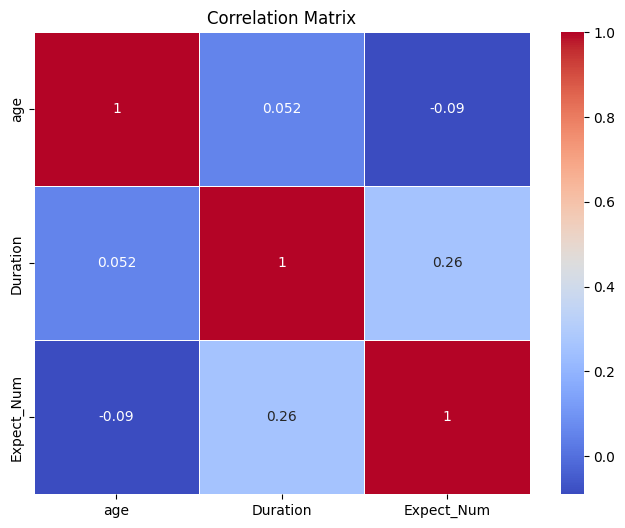

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Assuming 'Data_set 2 - Copy.csv' is the original file that has 'Age' column:
df_original = pd.read_csv("Data_set 2 - Copy.csv")

# Convert 'Duration' column to numerical representation using the duration_to_years function
# from Task 8. Make sure the function is defined before this cell.
def duration_to_years(duration):
    if duration == 'Less than 1 year':
        return 0.5  # Assume 0.5 years for less than 1 year
    elif duration == '1-3 years':
        return 2  # Assume average of 2 years
    elif duration == '3-5 years':
        return 4  # Assume average of 4 years
    elif duration == 'More than 5 years':
        return 6  # Assume 6 years for more than 5 years
    else:
        return float('nan')  # Handle any unexpected values

df_original['Duration'] = df_original['Duration'].apply(duration_to_years)


# Function to extract average from string like '20%-30%'
def extract_average_expect(expect_str):
    try:
        # Split the string by '-' and '%'
        parts = expect_str.replace('%', '').split('-')
        # Convert parts to float and calculate average
        avg = (float(parts[0]) + float(parts[1])) / 2
        return avg
    except (IndexError, ValueError):
        # Handle cases where the string format is unexpected
        return np.nan  # Return NaN for invalid values


# Apply the function to the 'Expect' column
df_original['Expect_Num'] = df_original['Expect'].apply(extract_average_expect)

# Compute correlation matrix using the original DataFrame,
# but use 'Expect_Num' (the new numerical column) instead of 'Expect'
correlation_matrix = df_original[['age', 'Duration', 'Expect_Num']].corr()

# Visualize using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()